<a href="https://colab.research.google.com/github/julia-walker/2022_ML_Earth_Env_Sci/blob/main/JW_S1_2_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

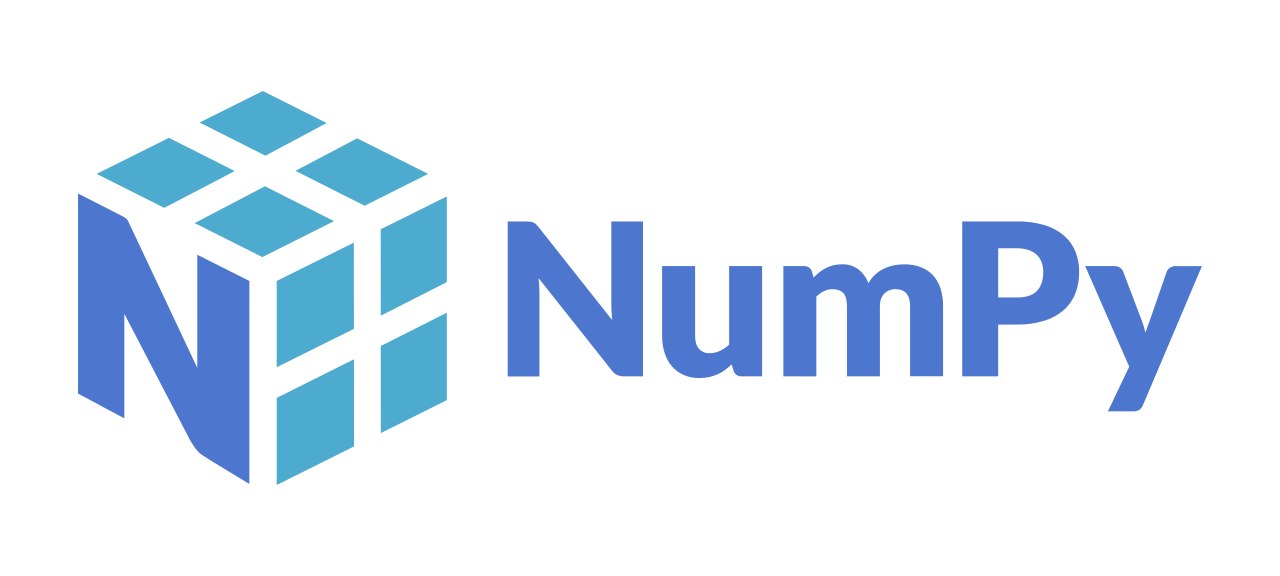

**Numpy** is the fundamental package for scientific computing with Python

Website: https://numpy.org/

GitHub: https://github.com/numpy/numpy

# Importing and Examining a New Package

This will be our first experience with importing a package which is not part of the Python standard library.

In [6]:
import numpy as np

What did we just do? We *imported* a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [ ]:
# find out what is in our namespace
dir()

In [ ]:
# find out what's in numpy
dir(np)

In [ ]:
# find out what version we have
np.__version__

There is no way we could explicitly learn/teach each of these functions. 
Therefore, the numpy documentation is crucial!

https://numpy.org/doc/stable/reference/

<a name="NDArrays"></a>
# NDArrays

The core class is the numpy ndarray (n-dimensional array).

The main difference between a numpy array an a more general data container such as `list` are the following:

*    Numpy arrays can have N dimensions (while `lists`, `tuples`, etc. only have 1)
*    Numpy arrays hold values of the same datatype (e.g. `int`, `float`), while `lists` can contain anything.
*    Numpy optimizes numerical operations on arrays. Numpy is *fast*!

In [23]:
from IPython.display import Image
Image(url='http://docs.scipy.org/doc/numpy/_images/threefundamental.png')

In [ ]:
# create an array from a list
a = np.array([9,0,2,1,0])

In [ ]:
# find out the datatype
a.dtype

In [ ]:
# find out the shape
a.shape

In [ ]:
# what is the shape
type(a.shape)

In [ ]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

# check dtype and shape
b.dtype, b.shape

**Note**

The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called “c-style” indexing)

# Array Creation

There are lots of ways to create arrays.

In [ ]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

`arange` works very similar to `range`, but it populates the array “eagerly” (i.e. immediately), rather than generating the values upon iteration.

In [ ]:
np.arange(10)

`arange` is left inclusive, right exclusive, just like `range`, 
but also works with floating-point numbers.

In [ ]:
np.arange(2,4,0.25)

A frequent need is to generate an array of N numbers, evenly spaced between two values. That is what `linspace` is for.

In [ ]:
np.linspace(2,4,20)

In [ ]:
# log spaced
np.logspace(1,2,10)

Numpy also has some utilities for helping us generate multi-dimensional arrays. `meshgrid` creates 2D arrays out of a combination of 1D arrays.

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

# Indexing

Basic indexing is similar to lists

In [ ]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

In [ ]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

In [ ]:
# get some ranges
xx[3:10,30:40].shape

There are many advanced ways to index arrays. You can [read about them](https://numpy.org/doc/stable/reference/arrays.indexing.html) in the manual. Here is one example.

In [ ]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

In [ ]:
# the array got flattened
xx.ravel().shape

# Visualizing Arrays with Matplotlib

It can be hard to work with big arrays without actually seeing anything with our eyes! We will now bring in Matplotib to start visualizating these arrays. For now we will just skim the surface of Matplotlib. Much more depth will be provided in the next notebook.

In [24]:
from matplotlib import pyplot as plt

For plotting a 1D array as a line, we use the `plot` command.

In [ ]:
plt.plot(x)

There are many ways to visualize 2D data. He we use `pcolormesh`.

In [ ]:
plt.pcolormesh(xx)

In [ ]:
plt.pcolormesh(yy)

# Array Operations

There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.

## Basic Math

In [ ]:
f = np.sin(xx) * np.cos(0.5*yy)

In [ ]:
plt.pcolormesh(f)

## Manipulating Array Dimensions

Swapping the dimension order is accomplished by calling `transpose`.

In [ ]:
f_transposed = f.transpose()
plt.pcolormesh(f_transposed)

We can also manually change the shape of an array… as long as the new shape has the same number of elements.

In [ ]:
g = np.reshape(f, (8,9))

However, be careful with reshaping data! You can accidentally lose the structure of the data.

In [ ]:
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

We can also “tile” an array to repeat it many times.

In [ ]:
f_tiled = np.tile(f,(3, 2))
plt.pcolormesh(f_tiled)

Another common need is to add an extra dimension to an array. This can be accomplished via indexing with `None`.

In [ ]:
x.shape

In [ ]:
x[None, :].shape

In [ ]:
x[None, :, None, None].shape

# Broadcasting

Not all the arrays we want to work with will have the same size. One approach would be to manually “expand” our arrays to all be the same size, e.g. using `tile`. *Broadcasting* is a more efficient way to multiply arrays of different sizes Numpy has specific rules for how broadcasting works. These can be confusing but are worth learning if you plan to work with Numpy data a lot.

The core concept of broadcasting is telling Numpy which dimensions are supposed to line up with each other.

In [ ]:
Image(url='http://scipy-lectures.github.io/_images/numpy_broadcasting.png',
     width=720)

Dimensions are automatically aligned *starting with the last dimension*. If the last two dimensions have the same length, then the two arrays can be broadcast.

In [ ]:
print(f.shape, x.shape)
g = f * x
print(g.shape)

In [ ]:
plt.pcolormesh(g)

However, if the last two dimensions are *not* the same, Numpy cannot just automatically figure it out.

In [ ]:
# multiply f by y
print(f.shape, y.shape)
h = f * y

We can help numpy by adding an extra dimension to `y` at the end. Then the length-50 dimensions will line up.

In [ ]:
print(f.shape, y[:, None].shape)
h = f * y[:, None]
print(h.shape)

In [ ]:
plt.pcolormesh(h)

<a name="Reduction_Operations"></a>
# Reduction Operations

In scientific data analysis, we usually start with a lot of data and want to reduce it down in order to make plots of summary tables. Operations that reduce the size of numpy arrays are called “reductions”. There are many different reduction operations. Here we will look at some of the most common ones.

In [ ]:
# sum
g.sum()

In [ ]:
# mean
g.mean()

In [ ]:
# standard deviation
g.std()

A key property of numpy reductions is the ability to operate on just one axis.

In [ ]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

In [ ]:
plt.plot(x, g_ymean)

In [ ]:
plt.plot(g_xmean, y)

<a name="Data_Files"></a>
# Data Files

It can be useful to save numpy data into files.

In [ ]:
np.save('g.npy', g)

**Warning**

Numpy `.npy` files are a convenient way to store temporary data, but they are not considered a robust archival format. Later we will learn about NetCDF, the recommended way to store earth and environmental data.

In [ ]:
g_loaded = np.load('g.npy')

np.testing.assert_equal(g, g_loaded)

# Exercise 2: Analyzing Ocean Floats Data using Numpy and Matplotlib

**Learning Goals**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

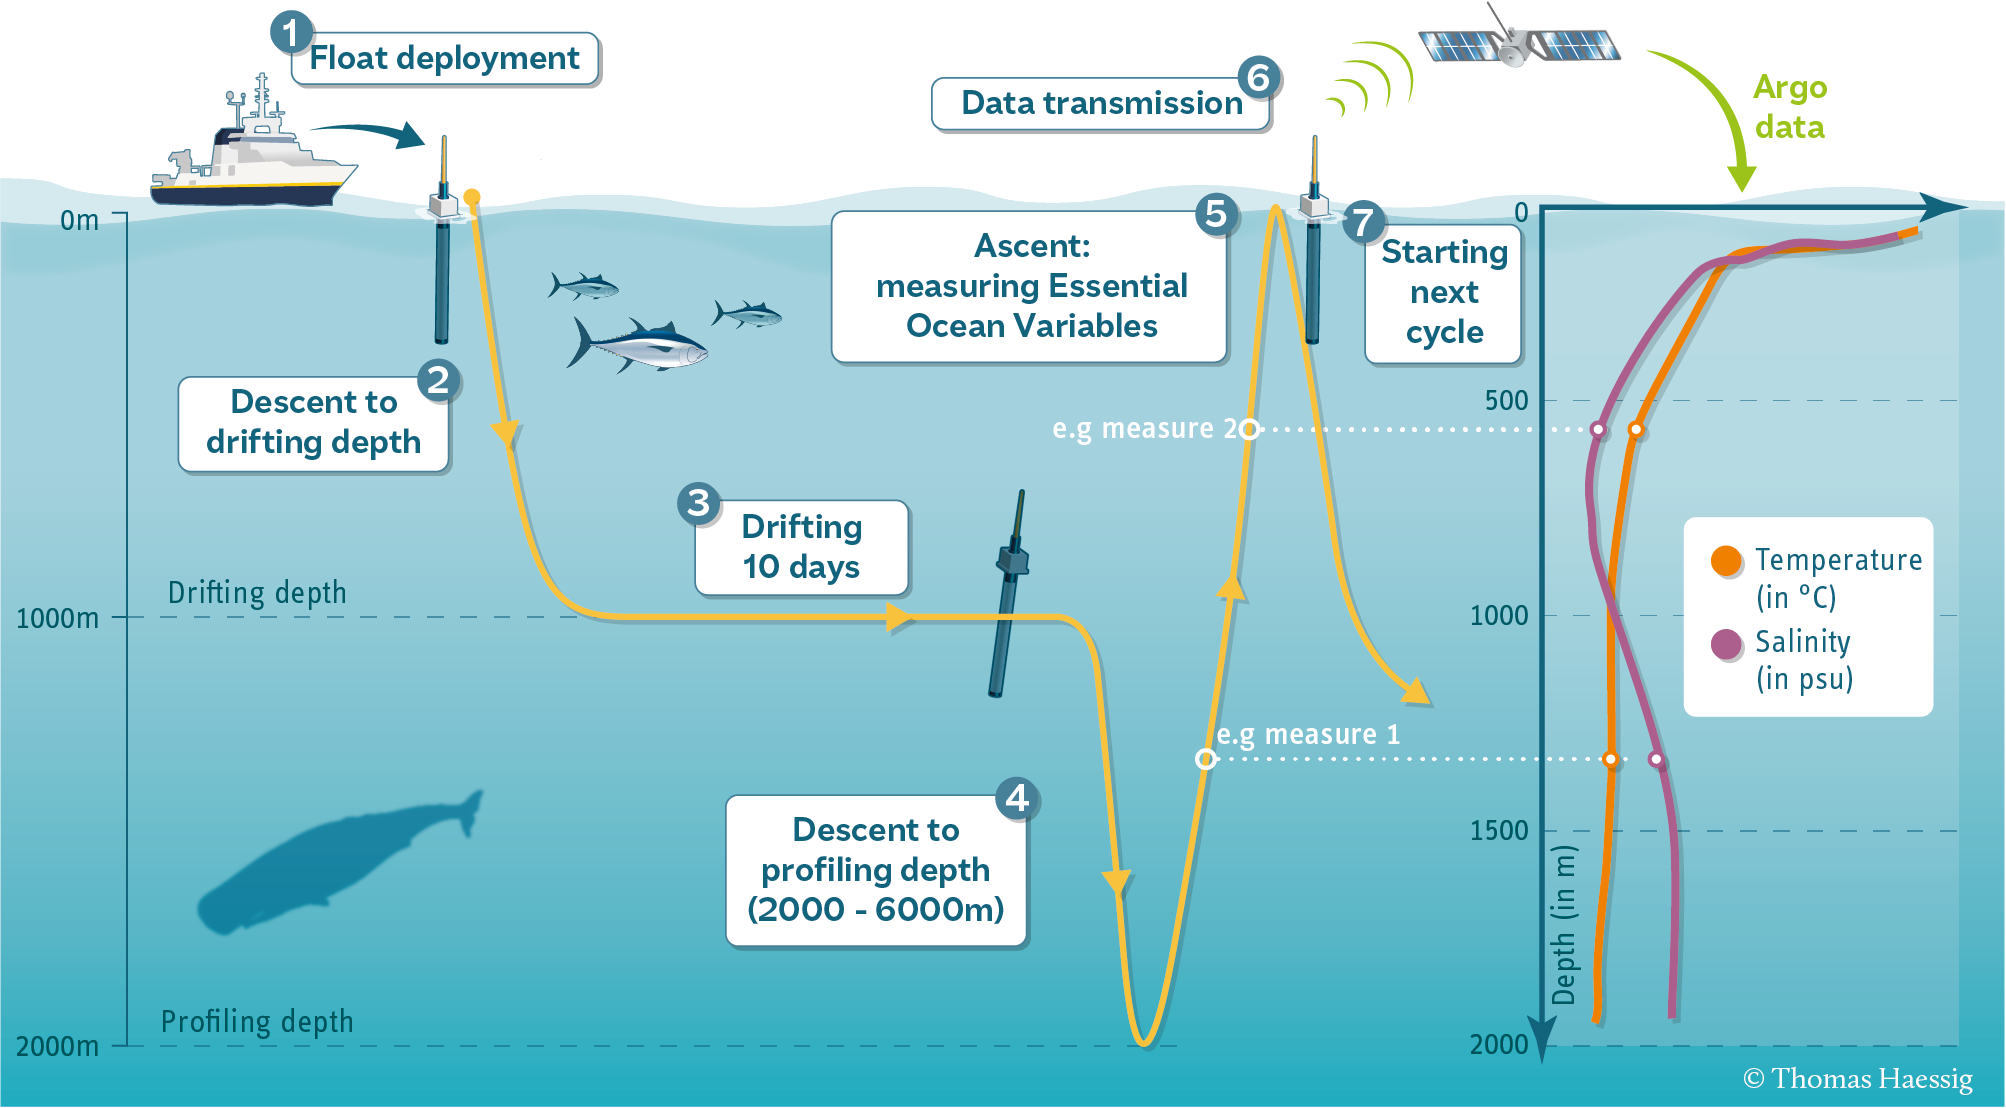

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [3]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the [Data Files subsection](#Data_Files).

In [4]:
# Display the names of the items in files here
files


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']

In [7]:
# Load the files as `numpy` arrays
T = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy')
S = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy')
P = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy')
date = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy')
lat = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy')
lon = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy')
level = np.load ('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy')

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)


In [8]:
# Display the `level` array
print(level)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


In [9]:
# Recreate the `level` array using `np.arange` and call it `level_arange`
level_arange = np.arange(78)

In [10]:
# Check that `level` and `level_arange` are equal using `np.assert_equal`
np.testing.assert_equal(level, level_arange)

In [11]:
# Recreate the `level` array using `np.linspace` and call it `level_linspace`
level_linspace = np.linspace(0,77,78)

In [12]:
# Check that `level` and `level_linspace` are equal using `np.assert_equal`
np.testing.assert_equal(level, level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

In [13]:
# Display the shapes of all loaded variables put as point shapes for each variable
T.shape
S.shape
P.shape
lon.shape
lat.shape
date.shape
level.shape

(78,)

Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`seawater_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.



Sources: 

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [14]:
a = 7.718e-1 
b = -8.44e-2 
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure. 

In [15]:
pip install gsw

     |████████████████████████████████| 2.4 MB 8.2 MB/s 


In [16]:
from gsw import CT_from_t

In [17]:
# Help for the function `CT_from_t`
CT_from_t?

Now it's all up to you. Here's the equation to avoid having to scroll back up:

`seawater_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$


In [18]:
# Calculate the conservative temperature

CT = CT_from_t(S, T, P)

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and `seawater_density` (four plots)**

Hint: The vertical scale should use the `level` data. Each plot should have a line for each column of data. It will look messy.

In [19]:
# Calculate the relative density
seawater_density = a * S + b * CT + c * ((CT)**2)

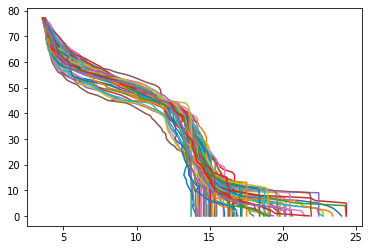

In [25]:
# Plot 1 title and axis labels 
plt.plot(T,level)




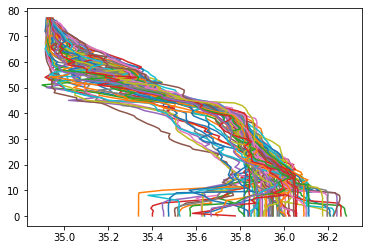

In [26]:
# Plot 2

plt.plot(S,level)

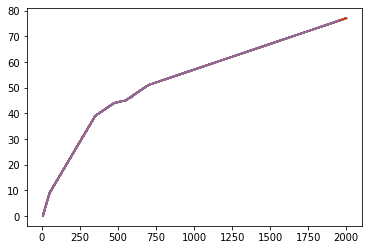

In [27]:
# Plot 3
plt.plot(P,level)


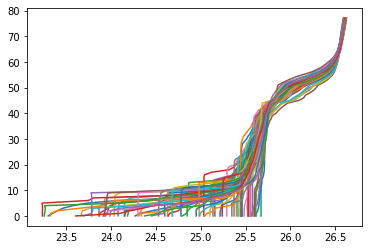

In [28]:
# Plot 4
plt.plot(seawater_density,level)

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: Check out the [Reduction Operations subsection](#Reduction_Operations).

In [52]:
# Compute the mean here
T_mean = T.mean(axis=1)
S_mean = S.mean (axis =1)
P_mean = P.mean (axis =1)
seawater_density_mean = seawater_density.mean(axis =1)


In [53]:
# Compute the standard deviation here
T_sd = T.std(axis=1)
S_sd = S.std(axis=1)
P_sd = P.std(axis=1)
seawater_density_sd = seawater_density.std(axis=1)


**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: [Here is the link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) to a `matplotlib` function to plot error bars.

<ErrorbarContainer object of 3 artists>

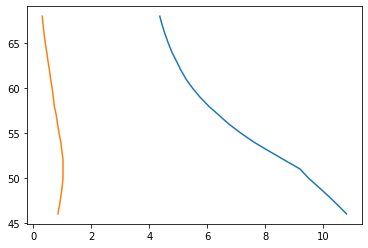

In [41]:
# Plot 1
plot1= plt.plot(T_mean,level)
plt.errorbar(T_sd,level)

<ErrorbarContainer object of 3 artists>

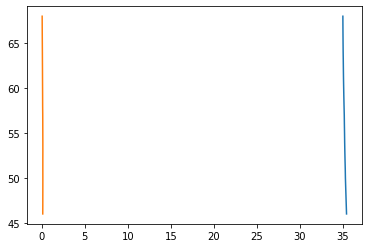

In [49]:
# Plot 2
plot2= plt.plot(S_mean,level)
plt.errorbar(S_sd,level)

<ErrorbarContainer object of 3 artists>

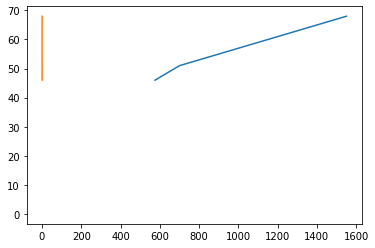

In [50]:
# Plot 3
plot3= plt.plot(P_mean,level)
plt.errorbar(P_sd,level)

<ErrorbarContainer object of 3 artists>

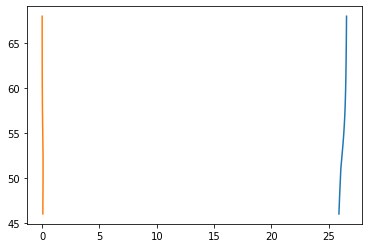

In [54]:
# Plot 4
plot4= plt.plot(seawater_density_mean,level)
plt.errorbar(seawater_density_sd,level)

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

In [58]:
# Recalculate the mean
np.nanmean(T)
np.nanmean(S)
np.nanmean(P)
np.nanmean(seawater_density)

25.83964391014039

In [60]:
# Recalculate the standard deviation
np.nanstd(T)
np.nanstd(S)
np.nanstd(P)
np.nanstd(seawater_density)




0.5787189163493786

**Q8) Create a scatter plot of the `lon`, `lat` positions of the ARGO floats.**

Hint: You may use the [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function

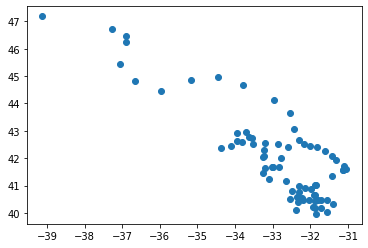

In [61]:
# Make your scatter plot here
plt.scatter(lon,lat)
